# Stroke Machine Learning Classification Analysis

## Load Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset
Data source:  kaggle

In [ ]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# number of rows and columns
df.shape

(5110, 12)

In [ ]:
# Data type and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data Cleaning

In [ ]:
# drop id
df = df.drop('id', axis=1)

In [ ]:
# How many missing values does bmi column have?
df['bmi'].isnull().sum()

201

In [ ]:
# replace missing value with mean of bmi column
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [ ]:
# Check number of missing values after replacement
df['bmi'].isnull().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
# descriptive statistics
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# count of age < 18
len(df[df['age'] < 15])

699

## Exploratory Data Analysis

### Histogram

In [ ]:
columns = ['age', 'avg_glucose_level', 'bmi']

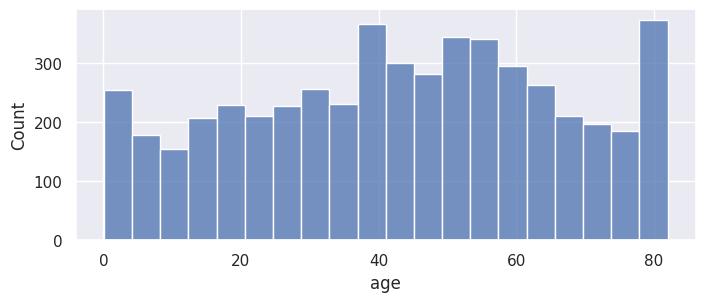

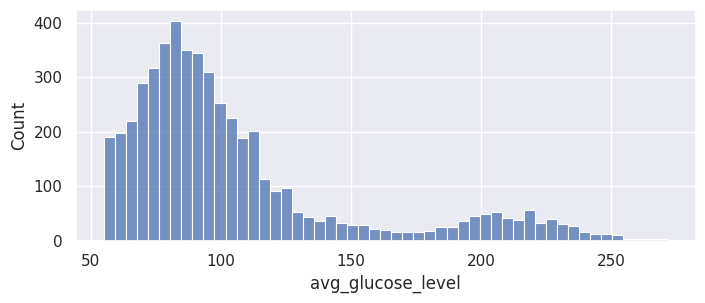

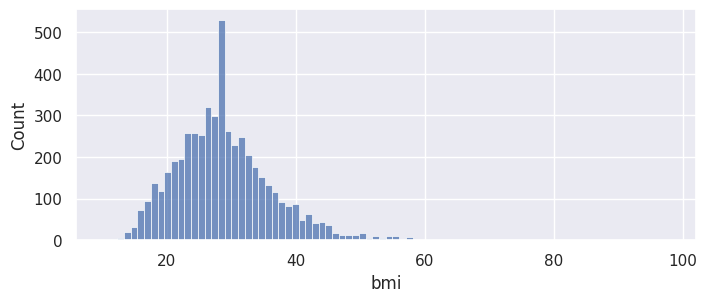

In [ ]:
sns.set(rc={"figure.figsize":(8, 3)})

for i in columns:
  sns.histplot(data = df, x = i)
  plt.show()

### Box Plots

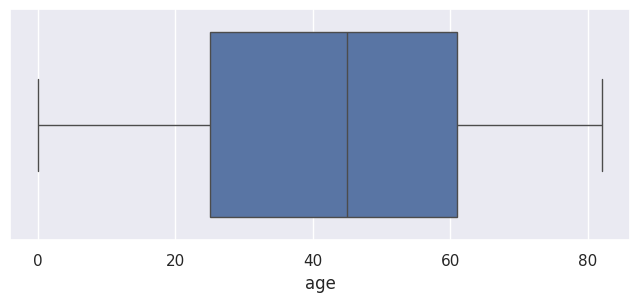

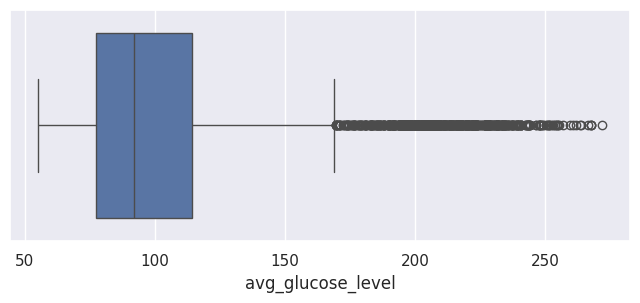

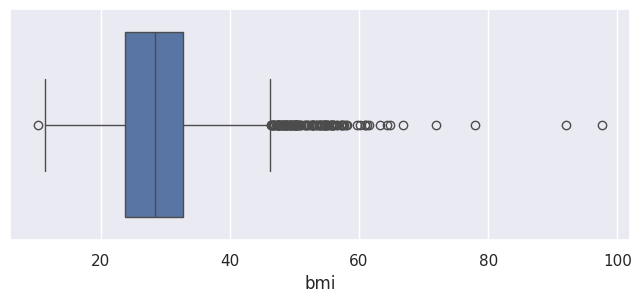

In [ ]:
sns.set(rc={"figure.figsize":(8, 3)})

for i in columns:
  sns.boxplot(x = df[i])
  plt.show()

<Axes: xlabel='gender', ylabel='avg_glucose_level'>

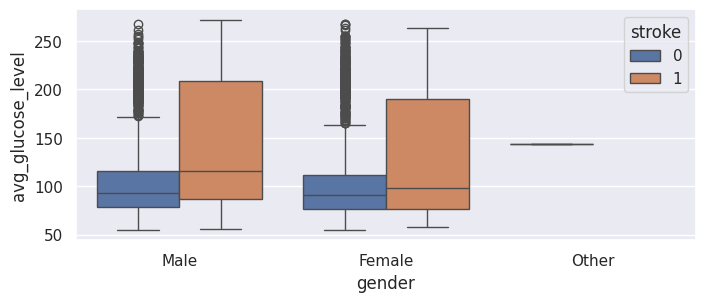

In [ ]:
sns.boxplot(x = df['gender'], y = df['avg_glucose_level'], hue = df['stroke']  )

<Axes: xlabel='gender', ylabel='age'>

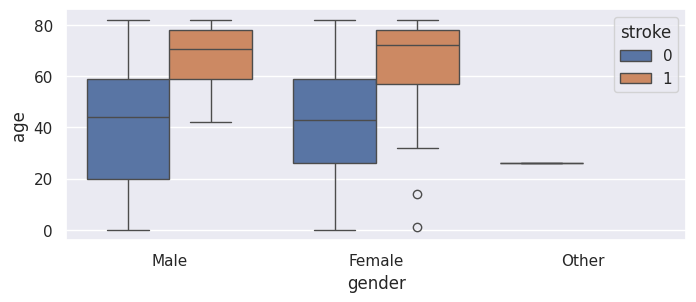

In [ ]:
sns.boxplot(x = df['gender'], y = df['age'], hue = df['stroke']  )

### Counts

In [ ]:
len(df[df['bmi'] > 46])

129

In [ ]:
len(df[df['avg_glucose_level'] > 170])

622

In [ ]:
df[df['bmi'] > 46]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
66,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1
113,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
4906,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0
5057,Female,49.0,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0


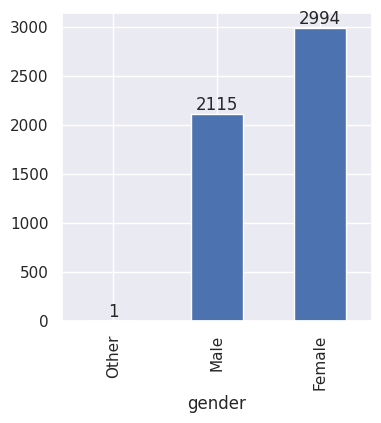

In [ ]:
ax,fig = plt.subplots(figsize=(4,4))
ax=df.gender.value_counts().sort_values(ascending=True).plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
#drop row that contains specific 'Other' in gender
df = df[df.gender != 'Other'].copy()

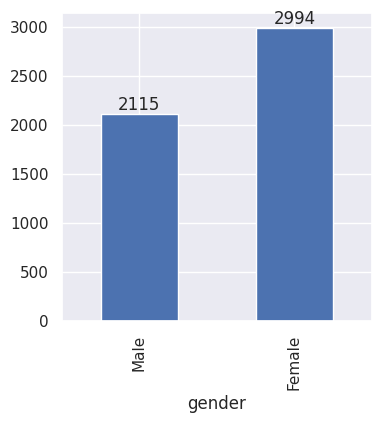

In [ ]:
ax,fig = plt.subplots(figsize=(4,4))
ax=df.gender.value_counts().sort_values(ascending=True).plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.show()

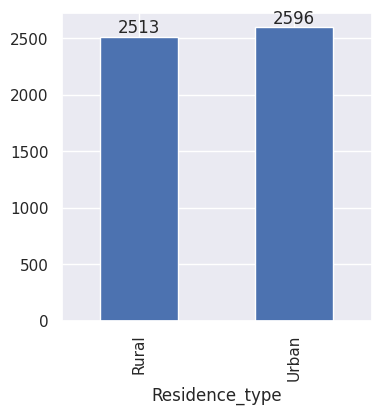

In [ ]:
ax,fig = plt.subplots(figsize=(4,4))
ax=df.Residence_type.value_counts().sort_values(ascending=True).plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.show()

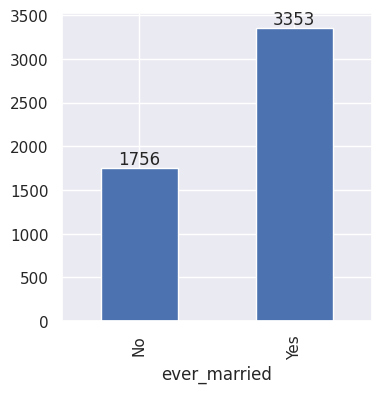

In [ ]:
ax,fig = plt.subplots(figsize=(4,4))
ax=df.ever_married.value_counts().sort_values(ascending=True).plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.show()

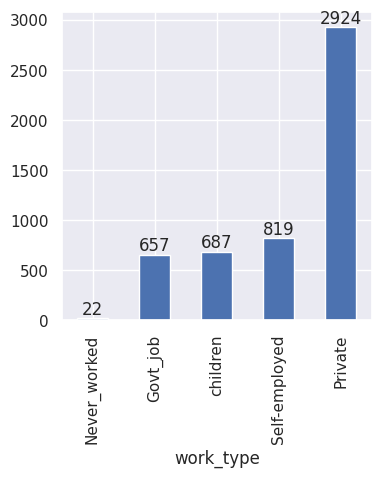

In [ ]:
ax,fig = plt.subplots(figsize=(4,4))
ax=df.work_type.value_counts().sort_values(ascending=True).plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.show()

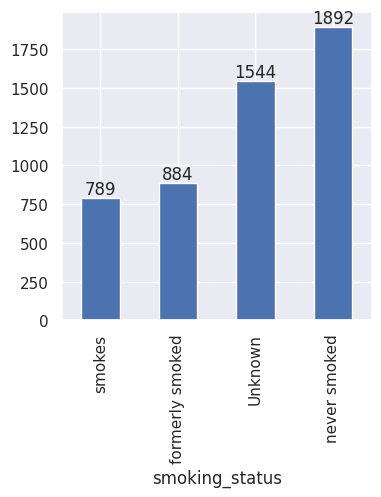

In [ ]:
ax,fig = plt.subplots(figsize=(4,4))
ax=df.smoking_status.value_counts().sort_values(ascending=True).plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.show()

### Scatter Plots

<Axes: xlabel='age', ylabel='bmi'>

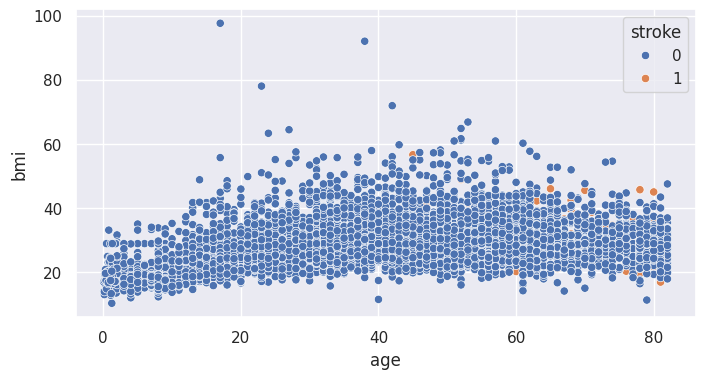

In [ ]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.scatterplot(data=df, x='age', y='bmi', hue='stroke')

<Axes: xlabel='age', ylabel='avg_glucose_level'>

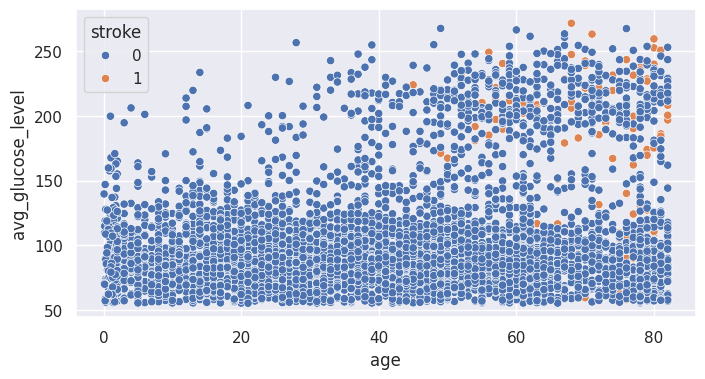

In [ ]:
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke')

<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

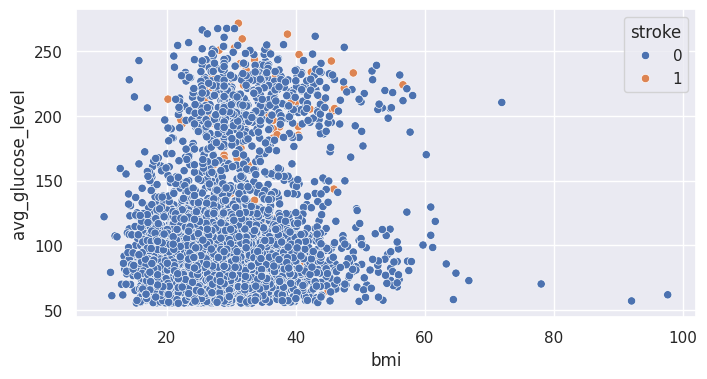

In [ ]:
sns.scatterplot(data=df, x='bmi', y='avg_glucose_level', hue='stroke')

## Encoding

### Columns with two categorical values.  Replace column values with 0 and 1.

In [ ]:
def dummyreplacewith1n0(df,col, value1, value2):
  df[col].replace({value1: 1, value2: 0},inplace=True)


In [ ]:
dummyreplacewith1n0(df,'gender', 'Female', 'Male')
dummyreplacewith1n0(df,'ever_married', 'Yes', 'No')
dummyreplacewith1n0(df,'Residence_type', 'Urban', 'Rural')


In [ ]:

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,1,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,0,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,1,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 479.0+ KB


### Onehotencode with pd.get_dummies categorical columns with more than two values

In [ ]:
df=pd.get_dummies(df,columns=['work_type', 'smoking_status'], prefix=['work', 'smoke'], dtype=int, drop_first=True)
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,1,0,0
1,1,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0,0,1,0
2,0,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0
3,1,49.0,0,0,1,1,171.23,34.400000,1,0,1,0,0,0,0,1
4,1,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,1,83.75,28.893237,0,0,1,0,0,0,1,0
5106,1,81.0,0,0,1,1,125.20,40.000000,0,0,0,1,0,0,1,0
5107,1,35.0,0,0,1,0,82.99,30.600000,0,0,0,1,0,0,1,0
5108,0,51.0,0,0,1,0,166.29,25.600000,0,0,1,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 5109 non-null   int64  
 1   age                    5109 non-null   float64
 2   hypertension           5109 non-null   int64  
 3   heart_disease          5109 non-null   int64  
 4   ever_married           5109 non-null   int64  
 5   Residence_type         5109 non-null   int64  
 6   avg_glucose_level      5109 non-null   float64
 7   bmi                    5109 non-null   float64
 8   stroke                 5109 non-null   int64  
 9   work_Never_worked      5109 non-null   int64  
 10  work_Private           5109 non-null   int64  
 11  work_Self-employed     5109 non-null   int64  
 12  work_children          5109 non-null   int64  
 13  smoke_formerly smoked  5109 non-null   int64  
 14  smoke_never smoked     5109 non-null   int64  
 15  smoke_smo

In [ ]:
# Move Target column (stroke) to the end of the dataframe
df = df.reindex(columns = [col for col in df.columns if col != 'stroke'] + ['stroke'])
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_formerly smoked,smoke_never smoked,smoke_smokes,stroke
0,0,67.0,0,1,1,1,228.69,36.600000,0,1,0,0,1,0,0,1
1,1,61.0,0,0,1,0,202.21,28.893237,0,0,1,0,0,1,0,1
2,0,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,0,1,0,1
3,1,49.0,0,0,1,1,171.23,34.400000,0,1,0,0,0,0,1,1
4,1,79.0,1,0,1,0,174.12,24.000000,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,1,83.75,28.893237,0,1,0,0,0,1,0,0
5106,1,81.0,0,0,1,1,125.20,40.000000,0,0,1,0,0,1,0,0
5107,1,35.0,0,0,1,0,82.99,30.600000,0,0,1,0,0,1,0,0
5108,0,51.0,0,0,1,0,166.29,25.600000,0,1,0,0,1,0,0,0


In [ ]:
df[df['stroke']==1].sort_values(by='age')

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_formerly smoked,smoke_never smoked,smoke_smokes,stroke
162,1,1.32,0,0,0,1,70.37,28.893237,0,0,0,1,0,0,0,1
245,1,14.00,0,0,0,0,57.93,30.900000,0,0,0,1,0,0,0,1
182,1,32.00,0,0,1,0,76.13,29.900000,0,1,0,0,0,0,1,1
118,1,38.00,0,0,0,1,82.28,24.000000,0,0,1,0,1,0,0,1
133,1,38.00,0,0,1,0,101.45,28.893237,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,0,82.00,0,1,1,1,144.90,26.400000,0,1,0,0,0,0,1,1
56,1,82.00,0,0,1,0,59.32,33.200000,0,1,0,0,0,1,0,1
188,0,82.00,0,0,1,0,86.62,29.500000,0,1,0,0,1,0,0,1
23,0,82.00,0,1,1,0,208.30,32.500000,0,1,0,0,0,0,0,1


## Split into Features and Target

In [ ]:
X = df.drop('stroke',axis=1)
y = df['stroke']

In [ ]:
print(X.shape, y.shape)

(5109, 15) (5109,)


## Check Target for Imbalance

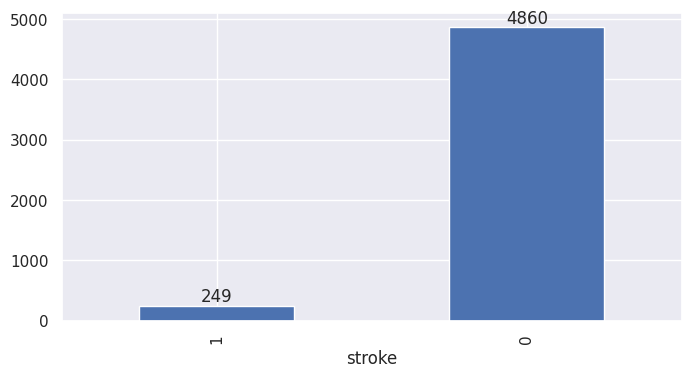

In [ ]:
 ax=df.stroke.value_counts().sort_values(ascending=True).plot(kind="bar")
 ax.bar_label(ax.containers[0])
 plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_res,y_res = ros.fit_resample(X,y)

#Before and after oversampling counts
from collections import Counter
print('Original dataset shape {}'. format(Counter(y)))
print('Resampled dataset shape {}'. format(Counter(y_res)))

Original dataset shape Counter({0: 4860, 1: 249})
Resampled dataset shape Counter({1: 4860, 0: 4860})


Used RandomOverSampler to rebalance the class distribution for the target "stroke".

## Split into Train and Test

In [ ]:
# split into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size = 0.33)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6512, 15) (3208, 15) (6512,) (3208,)


## Scale Data

In [ ]:
# Scaling the data
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#scaler = StandardScaler()
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Best Parameters

In [ ]:
#from sklearn.model_selection import GridSearchCV

# Define the parameter grid
#param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

# Create a grid search object
#grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

# Fit the grid search object to the training data
#grid.fit(X_train_scaled, y_train)

# Get the best parameters
#best_params = grid.best_params_

#print(best_params)
#{'C': 100, 'gamma': 1}

## Model

In [ ]:
from sklearn.svm import SVC

#define model
model_svm = SVC(kernel = 'rbf', C=100, gamma = 1, random_state=42)

#fit
model_svm.fit(X_train_scaled, y_train)

#predict
svm_pred = model_svm.predict(X_test_scaled)

## Metrics

Classification Report for Support Vector Machines
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1592
           1       0.94      1.00      0.97      1616

    accuracy                           0.97      3208
   macro avg       0.97      0.97      0.97      3208
weighted avg       0.97      0.97      0.97      3208



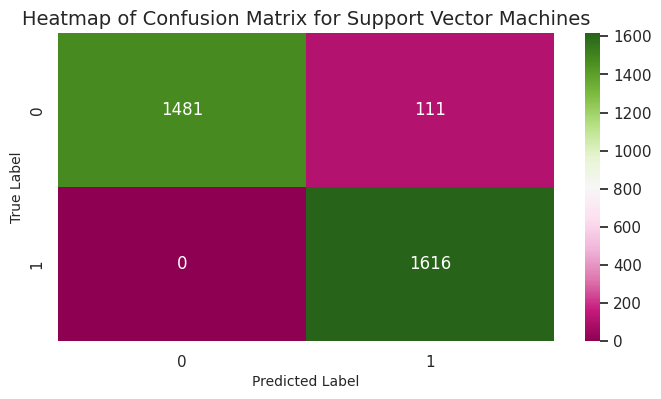

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Classification Report for Support Vector Machines")
print(classification_report(y_test,svm_pred))

#classes = ['No Stroke', 'Stroke']

#sns.heatmap(confusion_matrix(y_test,svm_pred), annot=True, fmt="d",cmap="PiYG",xticklabels=classes, yticklabels=classes)

sns.heatmap(confusion_matrix(y_test,svm_pred), annot=True, fmt="d",cmap="PiYG")

plt.title('Heatmap of Confusion Matrix for Support Vector Machines', fontsize =14) # title with fontsize 20

plt.xlabel('Predicted Label', fontsize = 10) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 10) # y-axis label with fontsize 15
plt.show()

## Feature Importance

In [ ]:
 from sklearn.inspection import permutation_importance
 feature_importances = permutation_importance(
 model_svm, X_test_scaled, y_test, n_repeats=10, random_state=42 )

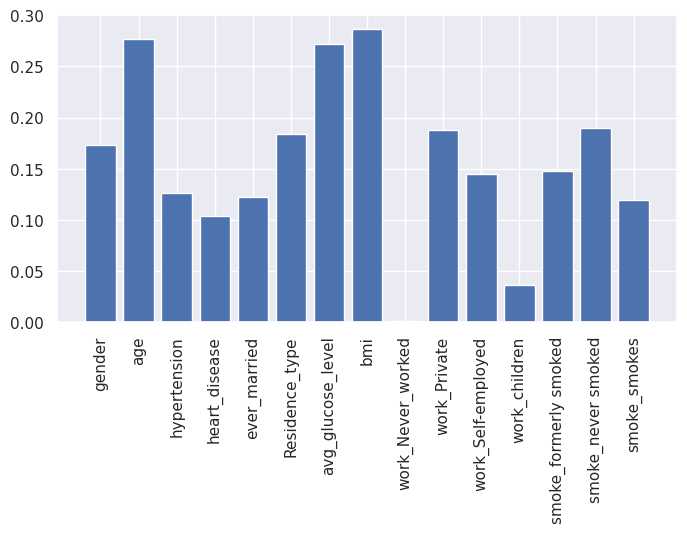

In [ ]:
 import matplotlib.pyplot as plt
 features = X_train.columns
 importances = feature_importances.importances_mean
 plt.bar(features, importances)
 plt.xticks(rotation=90)
 plt.show()

## Findings
* Age range for stroke patients is 40 - 80
* Average glucose level for stroke patients is above 100 with more activity above 150
* BMI for stroke patients is 20 - 60
* Best parameters for SVM model: {'C': 100, 'gamma': 1}
* The SVM model accuracy is 97%.
* Based on model results the most important features are age, bmi, and average glucose.  The secondary features are gender, residence (urban or rural), work is private, and never smoked.

## Limitations
There is a great imbalance between the number of stroke and non-stroke target values.  The data contained 249 observations for stroke and 4860 for non-stroke.  Imbalance over sampling was used to achieve equal number of stroke and non-stroke target values.